<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/04-wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 4: Data Wrangling

## Introduction:
In this lab, we will analyze college football data from the years 2016-2020. The data is spread across multiple files and will require a bit of “data wrangling”.

Once we have cleaned and processed the data, we will put our statistics knowledge to good use by digging a little deeper than simple summary statistics.

Very rarely are data scientists handed a pristine data set ready for analysis. More often than not, quite a bit of work is required to clean and preprocess the data so that it's ready for analysis.

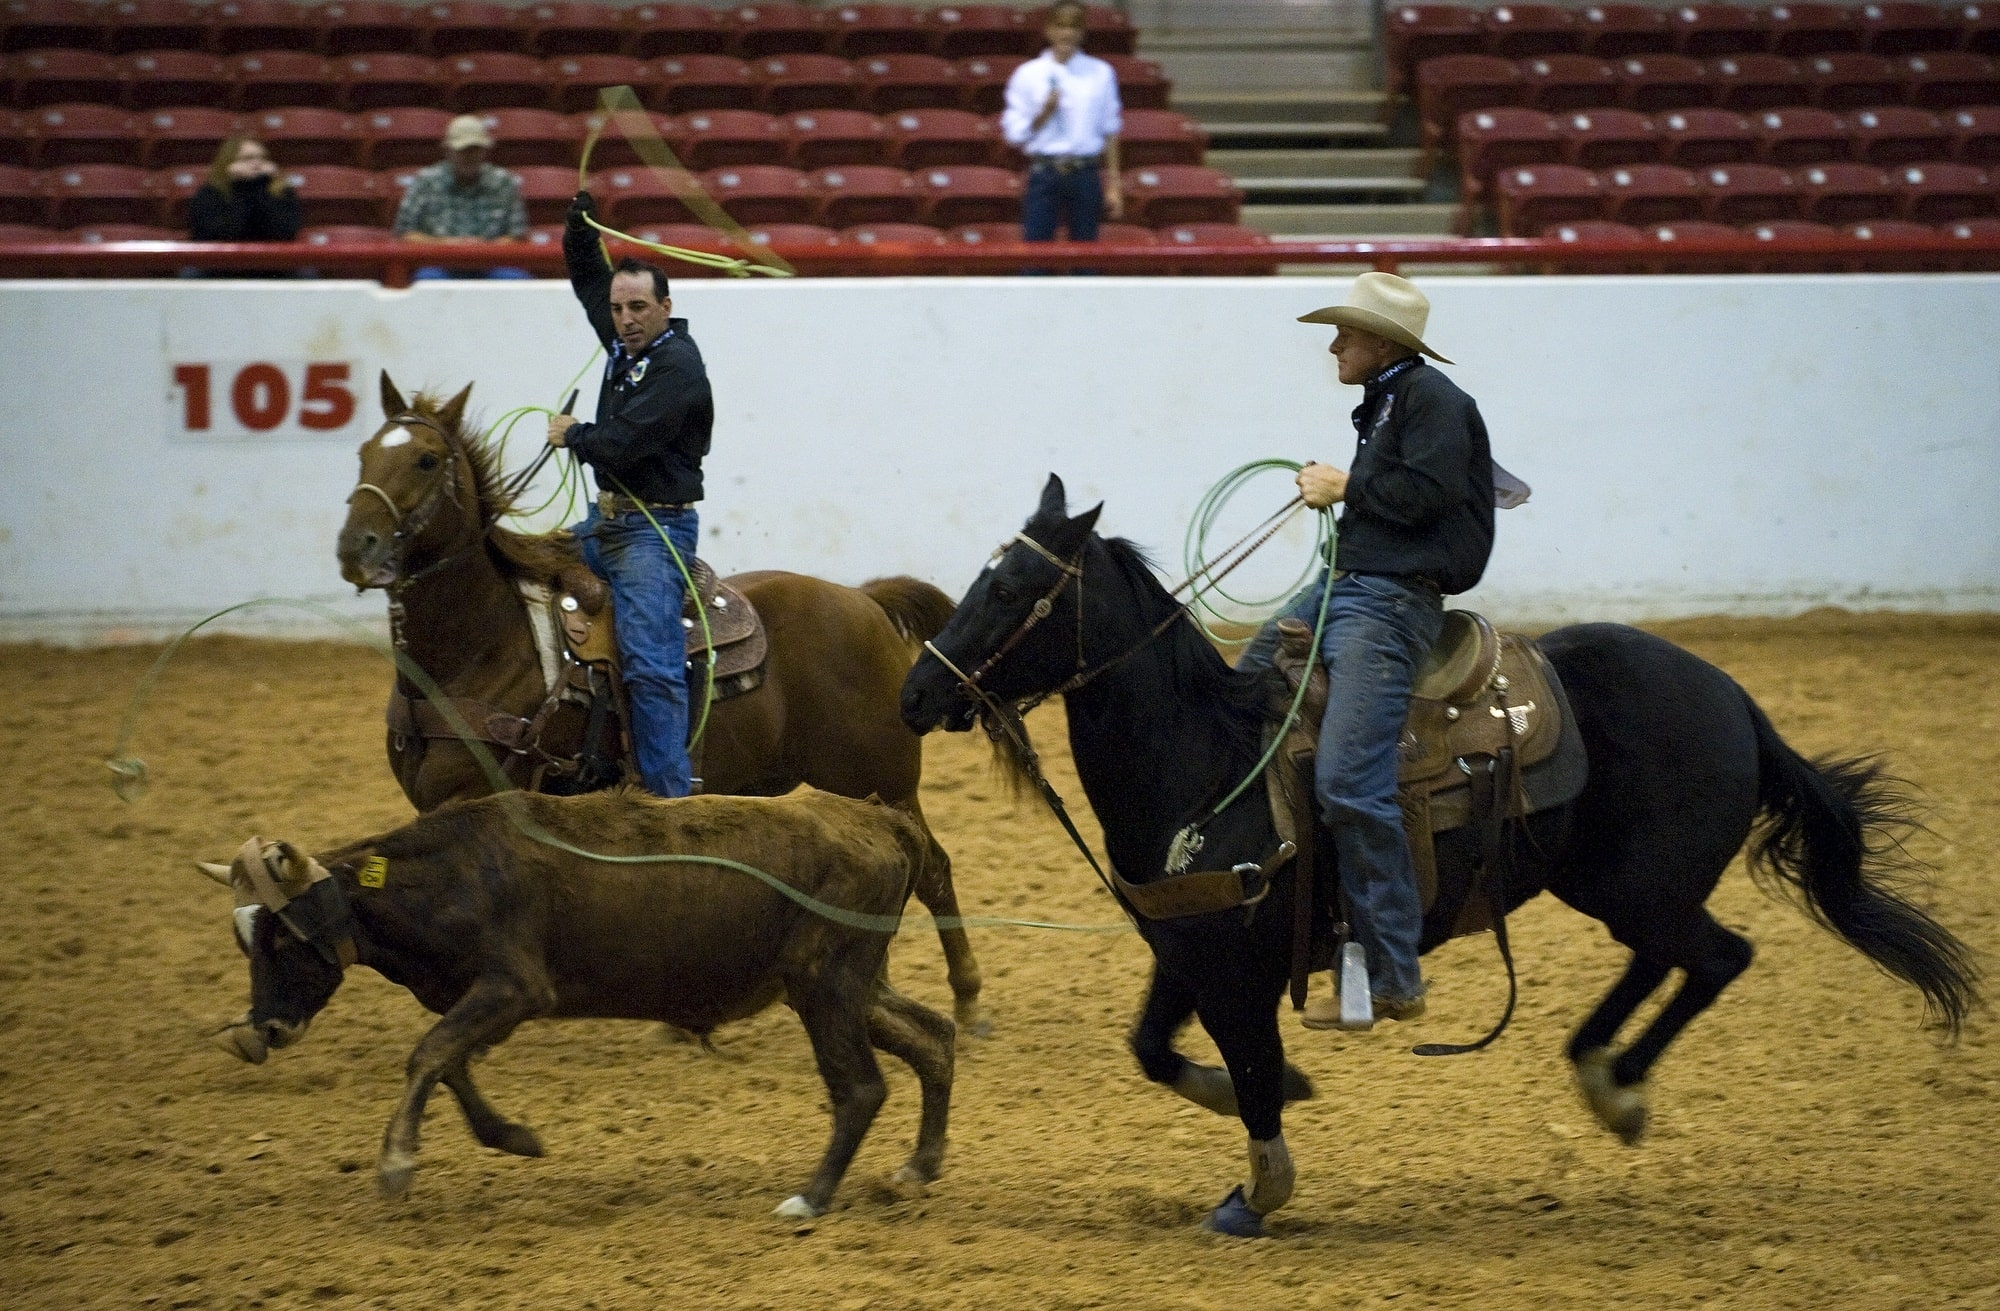

**Data wrangling**, also called **data cleaning**, **data remediation**, or **data munging**, refers to a variety of processes designed to transform raw data into more readily usable formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.

Some examples of data wrangling include:

- Merging multiple data sources into a single dataset for analysis.

- Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them.

- Deleting data that’s either unnecessary or irrelevant to the project you’re working on.

- Identifying extreme outliers in data and either explaining the discrepancies or removing them.

#### Measures of Variability
We are very used to comparing point estimates. For example, in order to tell if one thing is better than the other, we may look at the average of each over time. Consider the following plot comparing the average of two groups, mu_0 and mu_1.

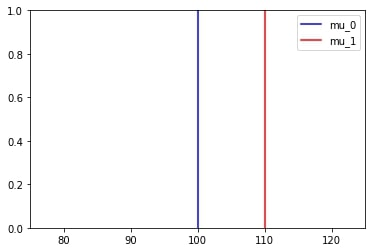

In this case, we might conclude that mu_1 is greater because it’s average is higher. However, we are ignoring an important aspect of the data: its variability.

When we plot the **variability and the mean**, we observe the following plot:

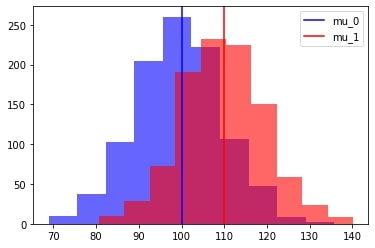

Now the distributions of mu_1 and mu_0 are so close that it’s difficult to say with certainty that mu_1 is better. For any random draw of mu_1, it’s roughly a 50-50 chance to actually be greater than a random draw of mu_0.

Now suppose we observe the following plot:

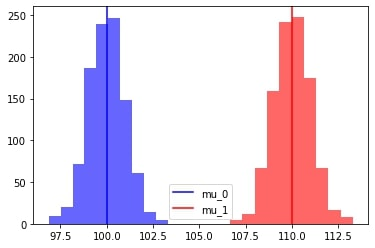

While the means are the same as before, the variability of the two distributions are now very different. We can say with a high degree of certainty that mu_1 is higher.

Keep this idea in mind as you analyze the dataset for this lab.

### **Data:**
Data from the 2016, 2017, 2018, 2019, and 2020 college football seasons are also available on the course GitHub:

In [27]:
# Download the data located at the following URLs
cfb16_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb16.csv"
cfb17_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb17.csv"
cfb18_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb18.csv"
cfb19_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb19.csv"
cfb20_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb20.csv"

## Exercise 1: Yearly Counts

### Exercise Question
Read in the files, and add a year column to each file (from the original .csv file name).

In [28]:
import requests
import pandas as pd


response = requests.get(cfb16_url)

if response.status_code == 200:
    with open("cfb16.csv", "wb") as file:
        file.write(response.content)
        df = pd.read_csv('cfb16.csv')
        df['year'] = 2016
        df.to_csv('cfb16.csv', index=False)


response = requests.get(cfb17_url)

if response.status_code == 200:
    with open("cfb17.csv", "wb") as file:
        file.write(response.content)
        df = pd.read_csv('cfb17.csv')
        df['year'] = 2017
        df.to_csv('cfb17.csv', index=False)


response = requests.get(cfb18_url)

if response.status_code == 200:
    with open("cfb18.csv", "wb") as file:
        file.write(response.content)
        df = pd.read_csv('cfb18.csv')
        df['year'] = 2018
        df.to_csv('cfb18.csv', index=False)


response = requests.get(cfb19_url)

if response.status_code == 200:
    with open("cfb19.csv", "wb") as file:
        file.write(response.content)
        df = pd.read_csv('cfb19.csv')
        df['year'] = 2019
        df.to_csv('cfb19.csv', index=False)


response = requests.get(cfb20_url)

if response.status_code == 200:
    with open("cfb20.csv", "wb") as file:
        file.write(response.content)
        df = pd.read_csv('cfb20.csv')
        df['year'] = 2020
        df.to_csv('cfb20.csv', index=False)


## Exercise 2: Data Aggregation

### Exercise Question
Combine every file into a single dataframe.

In [30]:
# Write your code to combine all of the csvs into one dataframe here:
import pandas as pd

cfb16_df = pd.read_csv('cfb16.csv')

cfb17_df = pd.read_csv('cfb17.csv')
cfb18_df = pd.read_csv('cfb18.csv')
cfb19_df = pd.read_csv('cfb19.csv')
cfb20_df = pd.read_csv('cfb20.csv')

combinedDataframe = pd.concat([cfb16_df, cfb17_df, cfb18_df, cfb19_df, cfb20_df], ignore_index=True)
combinedDataframe.head()

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,year
0,Akron (MAC),12,5,7,84,776,4649,5.99,38,387.4,...,114,6,8,14,8,14,22,-8,-0.67,2016
1,Alabama (SEC),15,14,1,34,1056,6829,6.47,59,455.3,...,17,13,16,29,10,9,19,10,0.67,2016
2,Appalachian St. (Sun Belt),13,10,3,52,912,5589,6.13,45,429.9,...,18,1,20,21,5,8,13,8,0.62,2016
3,Arizona (Pac-12),12,3,9,67,815,4957,6.08,39,413.1,...,112,6,8,14,9,12,21,-7,-0.58,2016
4,Arizona St. (Pac-12),12,5,7,81,900,4689,5.21,43,390.8,...,93,8,9,17,7,14,21,-4,-0.33,2016


## Exercise 3: Conference Search

### Exercise Question
Create a `conference` field by parsing the `team` column.



Example:

| Team | Conference |
| --- | --- |
| Penn State University (Big Ten) | Big Ten |

In [31]:
# Write your code to parse the conference from the team name:

# set all conferences to ''
combinedDataframe['Conference'] = ''

# for each team, parse out conference and set it to conference field
for team in combinedDataframe.itertuples(index=True):
  combinedDataframe.at[team.Index, 'Conference'] = team.Team[team.Team.find('(')+1:team.Team.find(')')]

combinedDataframe.head()

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,year,Conference
0,Akron (MAC),12,5,7,84,776,4649,5.99,38,387.4,...,6,8,14,8,14,22,-8,-0.67,2016,MAC
1,Alabama (SEC),15,14,1,34,1056,6829,6.47,59,455.3,...,13,16,29,10,9,19,10,0.67,2016,SEC
2,Appalachian St. (Sun Belt),13,10,3,52,912,5589,6.13,45,429.9,...,1,20,21,5,8,13,8,0.62,2016,Sun Belt
3,Arizona (Pac-12),12,3,9,67,815,4957,6.08,39,413.1,...,6,8,14,9,12,21,-7,-0.58,2016,Pac-12
4,Arizona St. (Pac-12),12,5,7,81,900,4689,5.21,43,390.8,...,8,9,17,7,14,21,-4,-0.33,2016,Pac-12


## Exercise 4: Big Ten Vs. South Eastern

### Exercise Question 4a: Offense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms of `Off.Yards.per.Game`? Use a [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure. Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Off.TDs`.

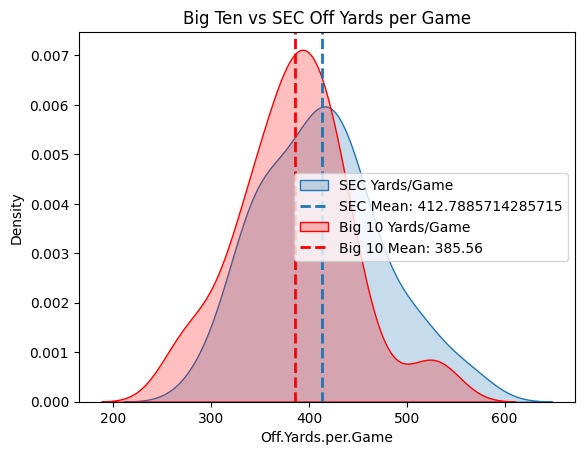

In [32]:
# Write the code for the statistical differences for Off.Yards.per.Game:

import seaborn as sns
import matplotlib.pyplot as plt

southEasternConference = combinedDataframe[combinedDataframe['Conference'] == 'SEC']
bigTenConference = combinedDataframe[combinedDataframe['Conference'] == 'Big Ten']

SECmean = southEasternConference['Off.Yards.per.Game'].mean()
bigTenMean = bigTenConference['Off.Yards.per.Game'].mean()


# Plot SEC
sns.kdeplot(southEasternConference['Off.Yards.per.Game'], label="SEC Yards/Game", fill=True)
plt.axvline(SECmean, linestyle='dashed', linewidth=2, label=f"SEC Mean: {SECmean}")

# Plot Big 10
sns.kdeplot(bigTenConference['Off.Yards.per.Game'], label="Big 10 Yards/Game", fill=True, color='red')
plt.axvline(bigTenMean, color='red', linestyle='dashed', linewidth=2, label=f"Big 10 Mean: {bigTenMean:.2f}")



plt.legend()
plt.title("Big Ten vs SEC Off Yards per Game")
plt.show()

**Comment on the difference in means and the overlap of distributions here**  

Considering the plot you see above, I think that there is no significant statistical distinction between the SEC and Big Ten Yards per game. Looking at this KDE plot, one will notice that while there is not a *perfect* overlap of the data, it is VERY close. The mean for Offensive Yards per Game in the SEC is 412, while the mean for the Big Ten is 385.The difference in these means is reletively small and the distributions have huge overlap between them. So, those things being considered, I don't think that there is significant difference between offensive yardage in the SEC and Big Ten.



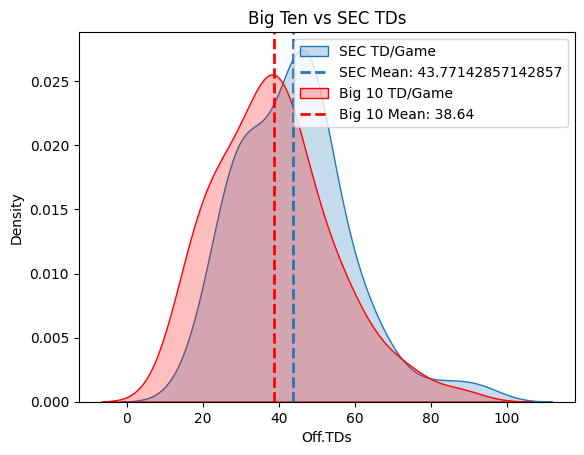

In [6]:
# Write the code for the statistical differences for Off.TDs:
import seaborn as sns
import matplotlib.pyplot as plt

southEasternConference = combinedDataframe[combinedDataframe['Conference'] == 'SEC']
bigTenConference = combinedDataframe[combinedDataframe['Conference'] == 'Big Ten']

SECmean = southEasternConference['Off.TDs'].mean()
bigTenMean = bigTenConference['Off.TDs'].mean()


# Plot SEC
sns.kdeplot(southEasternConference['Off.TDs'], label="SEC TD/Game", fill=True)
plt.axvline(SECmean, linestyle='dashed', linewidth=2, label=f"SEC Mean: {SECmean}")

# Plot Big 10
sns.kdeplot(bigTenConference['Off.TDs'], label="Big 10 TD/Game", fill=True, color='red')
plt.axvline(bigTenMean, color='red', linestyle='dashed', linewidth=2, label=f"Big 10 Mean: {bigTenMean:.2f}")


plt.legend()
plt.title("Big Ten vs SEC TDs")
plt.show()

**Comment on the difference in means and the overlap of distributions here**  
Again, I think that there is not a statistically significant difference between SEC and Big 10 Touchdowns. Looking at this KDE plot, one will notice that while there is not a perfect overlap of the data, it is VERY close. The mean for Touchdowns per season in the SEC is 43, while the mean for the Big Ten is 38.The difference in these means is reletively small (over the course of the whole season) and the distributions have huge overlap between them. So, those things being considered, I don't think that there is significant difference between Touchdowns in the SEC and Big Ten.

### Exercise Question 4b: Defense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`? Use a  [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Allowed`.



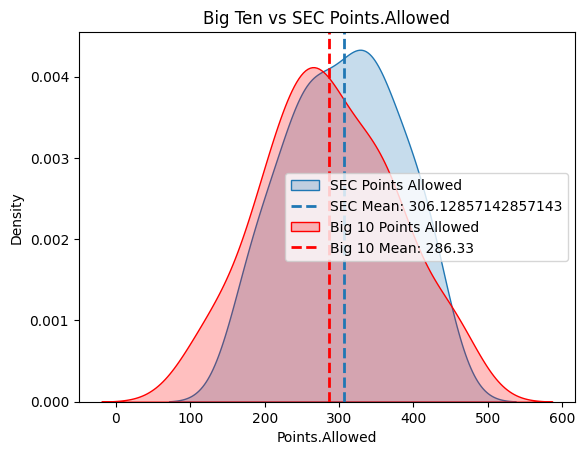

In [7]:
# Write the code for the statistical differences for Points.Allowed:

import seaborn as sns
import matplotlib.pyplot as plt

southEasternConference = combinedDataframe[combinedDataframe['Conference'] == 'SEC']
bigTenConference = combinedDataframe[combinedDataframe['Conference'] == 'Big Ten']

SECmean = southEasternConference['Points.Allowed'].mean()
bigTenMean = bigTenConference['Points.Allowed'].mean()


# Plot SEC
sns.kdeplot(southEasternConference['Points.Allowed'], label="SEC Points Allowed", fill=True)
plt.axvline(SECmean, linestyle='dashed', linewidth=2, label=f"SEC Mean: {SECmean}")

# Plot Big 10
sns.kdeplot(bigTenConference['Points.Allowed'], label="Big 10 Points Allowed", fill=True, color='red')
plt.axvline(bigTenMean, color='red', linestyle='dashed', linewidth=2, label=f"Big 10 Mean: {bigTenMean:.2f}")


plt.legend()
plt.title("Big Ten vs SEC Points.Allowed")
plt.show()


Considering this plot, I do not think there is anything statistically significantly different between the SEC and the Big 10. Again, Looking at this KDE plot, one will notice that the overlap of the data is VERY close. The mean for points allowed per season in the SEC is 306, while the mean for the Big Ten is 286.The difference in these means is very small (over the course of the whole season) and the distributions have huge overlap between them. So, those things being considered, I don't think that there is significant difference between points allowed in the SEC and Big Ten.

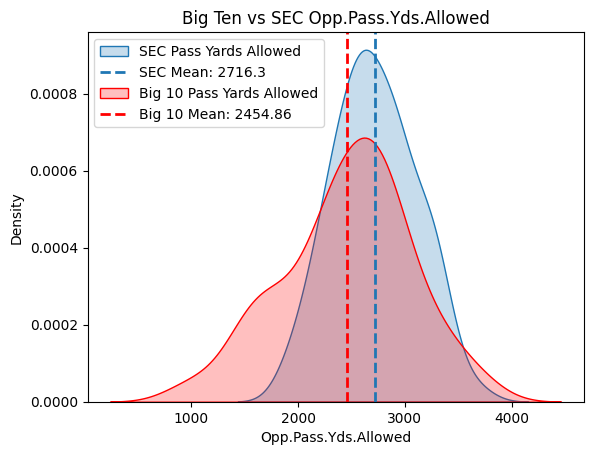

In [8]:
# Write the code for the statistical differences for Opp.Pass.Yds.Allowed:

import seaborn as sns
import matplotlib.pyplot as plt

southEasternConference = combinedDataframe[combinedDataframe['Conference'] == 'SEC']
bigTenConference = combinedDataframe[combinedDataframe['Conference'] == 'Big Ten']

SECmean = southEasternConference['Opp.Pass.Yds.Allowed'].mean()
bigTenMean = bigTenConference['Opp.Pass.Yds.Allowed'].mean()


# Plot SEC
sns.kdeplot(southEasternConference['Opp.Pass.Yds.Allowed'], label="SEC Pass Yards Allowed", fill=True)
plt.axvline(SECmean, linestyle='dashed', linewidth=2, label=f"SEC Mean: {SECmean}")

# Plot Big 10
sns.kdeplot(bigTenConference['Opp.Pass.Yds.Allowed'], label="Big 10 Pass Yards Allowed", fill=True, color='red')
plt.axvline(bigTenMean, color='red', linestyle='dashed', linewidth=2, label=f"Big 10 Mean: {bigTenMean:.2f}")


plt.legend()
plt.title("Big Ten vs SEC Opp.Pass.Yds.Allowed")
plt.show()


Considering this plot, I do not think there is anything statistically significantly different between the SEC and the Big 10. However, Looking at this KDE plot, one will notice that the overlap of the data is VERY close. The mean for points allowed per season in the SEC is 306, while the mean for the Big Ten is 286.The difference in these means is very small (over the course of the whole season) and the distributions have huge overlap between them. So, those things being considered, I don't think that there is significant difference between points allowed in the SEC and Big Ten.

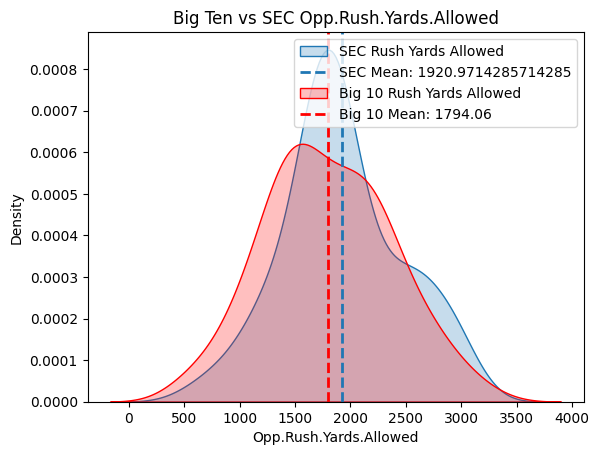

In [9]:
# Write the code for the statistical differences for Opp.Rush.Yards.Allowed:
import seaborn as sns
import matplotlib.pyplot as plt

southEasternConference = combinedDataframe[combinedDataframe['Conference'] == 'SEC']
bigTenConference = combinedDataframe[combinedDataframe['Conference'] == 'Big Ten']

SECmean = southEasternConference['Opp.Rush.Yards.Allowed'].mean()
bigTenMean = bigTenConference['Opp.Rush.Yards.Allowed'].mean()


# Plot SEC
sns.kdeplot(southEasternConference['Opp.Rush.Yards.Allowed'], label="SEC Rush Yards Allowed", fill=True)
plt.axvline(SECmean, linestyle='dashed', linewidth=2, label=f"SEC Mean: {SECmean}")

# Plot Big 10
sns.kdeplot(bigTenConference['Opp.Rush.Yards.Allowed'], label="Big 10 Rush Yards Allowed", fill=True, color='red')
plt.axvline(bigTenMean, color='red', linestyle='dashed', linewidth=2, label=f"Big 10 Mean: {bigTenMean:.2f}")


plt.legend()
plt.title("Big Ten vs SEC Opp.Rush.Yards.Allowed")
plt.show()

**Comment on the difference in means and the overlap of distributions here**  

Again, looking at this plot I see no statistically significant difference between SEC and Big 10 Rush Yards allowed. THe mean for SEC rush yards allowed is 1920 over the season and the average ruch yards allowed for Big Ten is 1794. While that sounds like a big difference, The distributions have a massive overlap. I think that this shows that they are very similar with very little statistical significance.

## Exercise 5: Offense Statistics

### Exercise Question 5a: Offense
Is the offense changing over time? Create some plots showing the average offensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Off.Yards.per.Game`
- `Off.TDs`

<ipython-input-19-55ef414bdfb4>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='year', y='Off.Yards.per.Game', data=southEasternConference, ci='sd', marker='o', color='red')
<ipython-input-19-55ef414bdfb4>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='year', y='Off.Yards.per.Game', data=bigTenConference, ci='sd', marker='o')


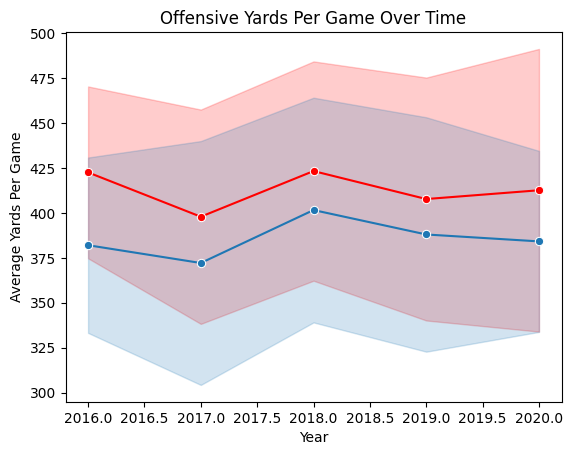

In [19]:
# Create a few plots showing how each metric changed over time:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


southEasternConference = combinedDataframe[combinedDataframe['Conference'] == 'SEC']
bigTenConference = combinedDataframe[combinedDataframe['Conference'] == 'Big Ten']


sns.lineplot(x='year', y='Off.Yards.per.Game', data=southEasternConference, ci='sd', marker='o', color='red')
sns.lineplot(x='year', y='Off.Yards.per.Game', data=bigTenConference, ci='sd', marker='o')

plt.title("Offensive Yards Per Game Over Time")
plt.xlabel("Year")
plt.ylabel("Average Yards Per Game")
plt.show()

**Comment on any trends you see here**  

I think that there is nothing significant happening to the offence over time. I say that because both the SEC and Big Ten lines remain mostly horizontal and the error marigins overlap the entire time. Because the error margins overlap so much it is highly unlikely that there is anything significant happening and there is very little upward or downward movement over time.

<ipython-input-21-2068be2c7376>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='year', y='Off.TDs', data=southEasternConference, ci='sd', marker='o', color='red')
<ipython-input-21-2068be2c7376>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='year', y='Off.TDs', data=bigTenConference, ci='sd', marker='o')


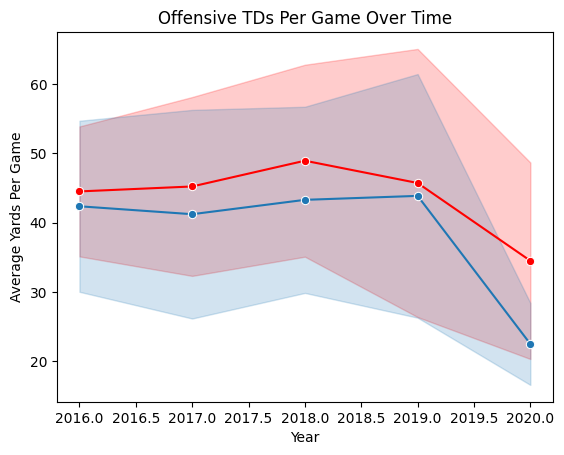

In [21]:
# Create a few plots showing how each metric changed over time:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


southEasternConference = combinedDataframe[combinedDataframe['Conference'] == 'SEC']
bigTenConference = combinedDataframe[combinedDataframe['Conference'] == 'Big Ten']


sns.lineplot(x='year', y='Off.TDs', data=southEasternConference, ci='sd', marker='o', color='red')
sns.lineplot(x='year', y='Off.TDs', data=bigTenConference, ci='sd', marker='o')

plt.title("Offensive TDs Per Game Over Time")
plt.xlabel("Year")
plt.ylabel("Average Yards Per Game")
plt.show()

**Comment of if something is happening to average yards per game**  

I think that there is definately something happening in 2020. As you can see from the chart above, there is a massive drop in average yards per game between 2019 and 2020. This big of a drop (with a very small room for error in the Big 10 in 2020), shows that there must be something significant happening from 2019 to 2020. I think that this may be true, I wonder ig a team left the big 10 in 2020 or if COVID impacted stats somehow.

### Exercise Question 5b: Defense
Is the defense changing over time? Create some plots showing the average defensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Points.Allowed`
- `Opp.Pass.Yds.Allowed`
- `Opp.Rush.Yards.Allowed`

<ipython-input-22-5186eef6360c>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='year', y='Points.Allowed', data=southEasternConference, ci='sd', marker='o', color='red')
<ipython-input-22-5186eef6360c>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='year', y='Points.Allowed', data=bigTenConference, ci='sd', marker='o')


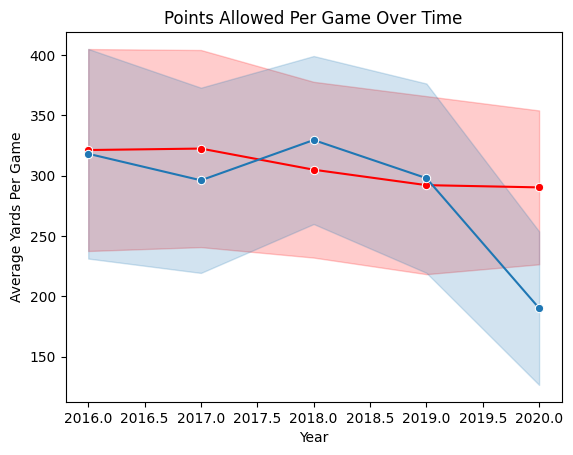

In [22]:
# Create a few plots showing how each metric changed over time:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


southEasternConference = combinedDataframe[combinedDataframe['Conference'] == 'SEC']
bigTenConference = combinedDataframe[combinedDataframe['Conference'] == 'Big Ten']


sns.lineplot(x='year', y='Points.Allowed', data=southEasternConference, ci='sd', marker='o', color='red')
sns.lineplot(x='year', y='Points.Allowed', data=bigTenConference, ci='sd', marker='o')

plt.title("Points Allowed Per Game Over Time")
plt.xlabel("Year")
plt.ylabel("Average Yards Per Game")
plt.show()


**Comment on Average yards per game trend**  

Looking at this graph I think that there is definately something happening. I say that because the Big 10 graph line dropped significantly between 2019 and 2020. I say that something must be happening because at that point the error margin is overlapping very little. So, I think there likely is something going on. Perhaps COVID had a bigger impact on big 10 teams than SEC teams.

<ipython-input-23-d6d2c72c457e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='year', y='Opp.Pass.Yds.Allowed', data=southEasternConference, ci='sd', marker='o', color='red')
<ipython-input-23-d6d2c72c457e>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='year', y='Opp.Pass.Yds.Allowed', data=bigTenConference, ci='sd', marker='o')


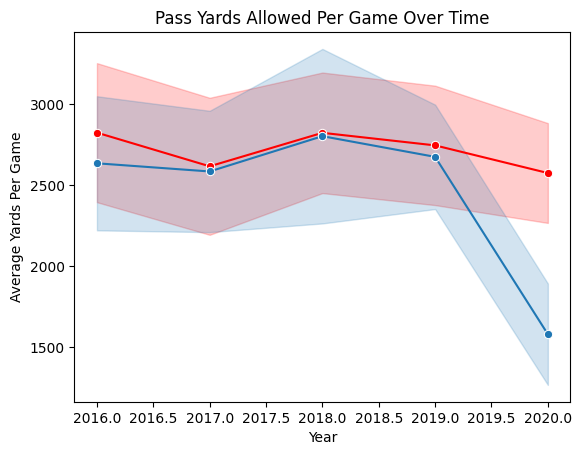

In [23]:
# Create a few plots showing how each metric changed over time:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


southEasternConference = combinedDataframe[combinedDataframe['Conference'] == 'SEC']
bigTenConference = combinedDataframe[combinedDataframe['Conference'] == 'Big Ten']


sns.lineplot(x='year', y='Opp.Pass.Yds.Allowed', data=southEasternConference, ci='sd', marker='o', color='red')
sns.lineplot(x='year', y='Opp.Pass.Yds.Allowed', data=bigTenConference, ci='sd', marker='o')

plt.title("Pass Yards Allowed Per Game Over Time")
plt.xlabel("Year")
plt.ylabel("Average Yards Per Game")
plt.show()

**Comment on this graph**  

Even more than the previous graph, I think that there is definately something happening that is statistically significant between 2019 and 2020. I say that because in 2020 there is NO overlap between the SEC and Big Ten Teams error margins. Considering that, I think that there must be something happening here. If I had to guess I would expect that perhaps something having to do with COVID impacted the Big 10 teams that didn't impact the SEC teams.

<ipython-input-25-417805477d8b>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='year', y='Opp.Rush.Yards.Allowed', data=southEasternConference, ci='sd', marker='o', color='red')
<ipython-input-25-417805477d8b>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='year', y='Opp.Rush.Yards.Allowed', data=bigTenConference, ci='sd', marker='o')


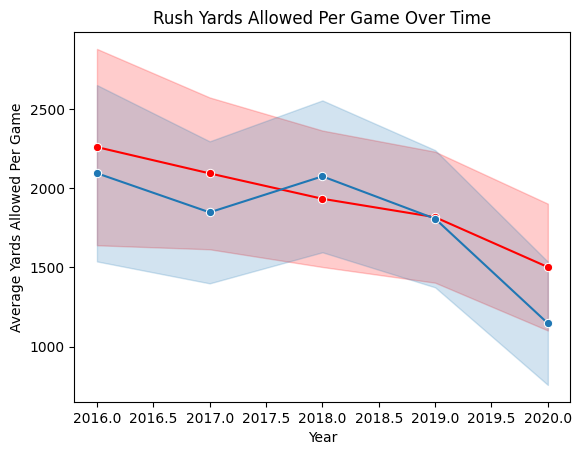

In [25]:
# Create a few plots showing how each metric changed over time:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


southEasternConference = combinedDataframe[combinedDataframe['Conference'] == 'SEC']
bigTenConference = combinedDataframe[combinedDataframe['Conference'] == 'Big Ten']


sns.lineplot(x='year', y='Opp.Rush.Yards.Allowed', data=southEasternConference, ci='sd', marker='o', color='red')
sns.lineplot(x='year', y='Opp.Rush.Yards.Allowed', data=bigTenConference, ci='sd', marker='o')

plt.title("Rush Yards Allowed Per Game Over Time")
plt.xlabel("Year")
plt.ylabel("Average Yards Allowed Per Game")
plt.show()

**Comment on any trends you see here**  

I think that there is something significant happening to cause both the SEC and Big Ten average yards allowed per game to drop. However, that being said, I don't think that there is anything significant happening differently in the SEC than the Big Ten. I do think that there is definately a downward trend for both the SEC and the Big Ten. If I had to guess on this one, I would expect that maybe defense in both conferences saw significant improvement.